In [6]:
from IPython.core.pylabtools import figsize
import numpy as np
from numpy.random import dirichlet
from matplotlib import pyplot as plt
%matplotlib inline
figsize(12.5, 4)

サンプル作成、事後分布推定

In [4]:
n = 1000
n_79 = 10
n_49 = 46
n_25 = 80
n_0 = n - (n_79 + n_49 + n_25)

observations = np.array([n_79, n_49, n_25, n_0])

prior_parameters = np.array([1,1,1,1])
posterior_samples = dirichlet(prior_parameters + observations, size=10000)

In [5]:
print("Two random samples from the posterior:")
print(posterior_samples[0])
print(posterior_samples[1])

Two random samples from the posterior:
[ 0.00745096  0.0594976   0.0787191   0.85433234]
[ 0.00611829  0.05454592  0.07923547  0.86010032]


事後分布描画

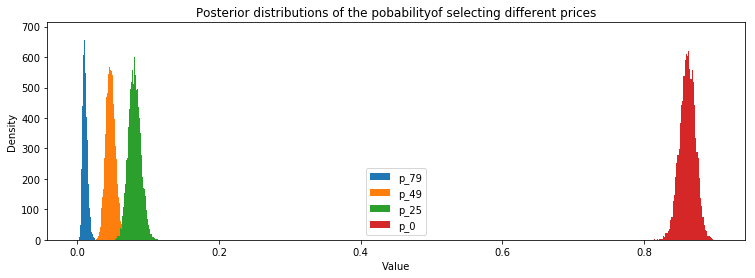

In [15]:
for i , label in enumerate(['p_79', 'p_49', 'p_25', 'p_0']):
    plt.hist(posterior_samples[:, i], bins=50,
                    label=label, histtype='stepfilled')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title("Posterior distributions of the pobability"
                 "of selecting different prices")
plt.legend()

期待値の事後分布

In [10]:
def  expected_revenue(P):
    return 79 * P[:, 0] + 49 * P[:, 1] + 25 * P[:, 2] + 0 * P[:, 3]

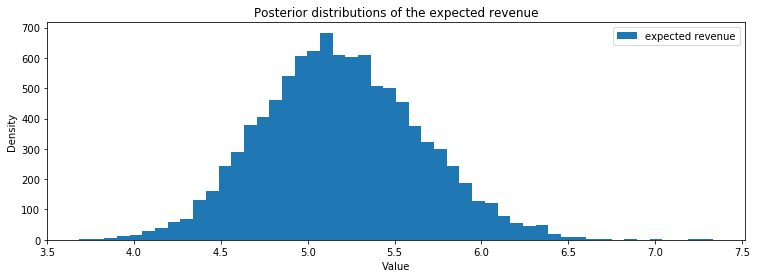

In [16]:
posterior_expected_revenue = expected_revenue(posterior_samples)
plt.hist(posterior_expected_revenue, histtype='stepfilled',
        bins=50, label='expected revenue')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title("Posterior distributions of the expected revenue")
plt.legend()